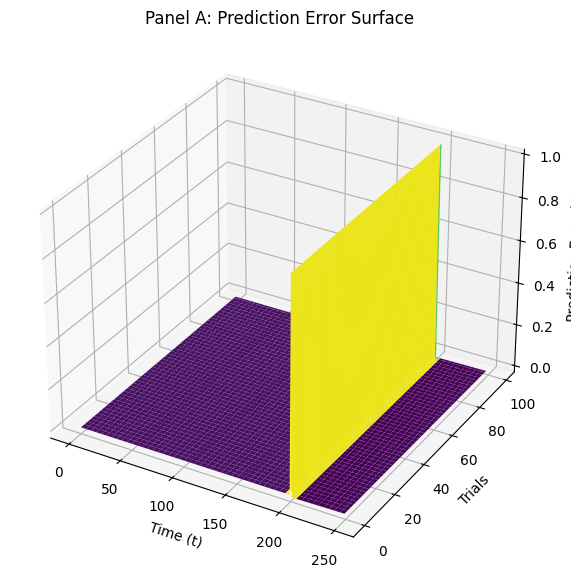

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
n_trials = 100  # Number of trials
n_timesteps = 250  # Time steps per trial
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate

# Initialize variables
reward_time = 200  # Time step where reward occurs
stimulus_time = 100  # Time step where stimulus occurs
prediction_error = np.zeros((n_trials, n_timesteps))  # Prediction error matrix

# Loop through trials
for trial in range(n_trials):
    # Initialize value and reward prediction
    value = np.zeros(n_timesteps)
    reward = np.zeros(n_timesteps)
    
    # Define reward at specific time step
    reward[reward_time] = 1

    # Loop through time steps in each trial
    for t in range(1, n_timesteps):
        if t == stimulus_time:
            stimulus = 1  # Stimulus onset
        else:
            stimulus = 0
        
        # Calculate TD Error (Prediction Error)
        td_error = reward[t] + gamma * value[t - 1] - value[t - 1]
        prediction_error[trial, t] = td_error

        # Update value
        value[t] = value[t - 1] + alpha * td_error

# Plot the Prediction Error Surface (Panel A)
t_vals = np.arange(n_timesteps)
trials_vals = np.arange(n_trials)
T, Trials = np.meshgrid(t_vals, trials_vals)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T, Trials, prediction_error, cmap='viridis')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Trials')
ax.set_zlabel('Prediction Error (δ)')
ax.set_title('Panel A: Prediction Error Surface')
plt.show()
